**Tarea 2**

Equipo dinamita


*   López Carrillo Alan Ignacio
*   Escorza Cantú Mauricio
*   San Martín Macías Juan Daniel
*   Jimenez Reyes Abraham






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#Dataset Mnist

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
df = df.to_numpy()

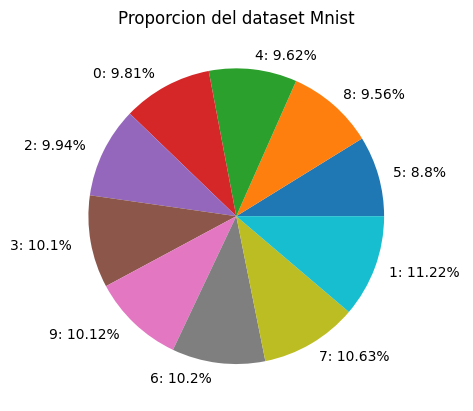

In [ ]:
X = df[:,1:]
y = df[:,0]

clases, cantidades = np.unique(y, return_counts=True)
cantidades_ind = np.argsort(cantidades)
total = sum(cantidades)
lab_tex = [f'{clases[cantidades_ind[ind]]}: {round(var*100/total, 2)}% ' for ind, var in enumerate(cantidades[cantidades_ind])]
plt.pie(cantidades[cantidades_ind], labels=lab_tex)
plt.title('Proporcion del dataset Mnist')
plt.show()

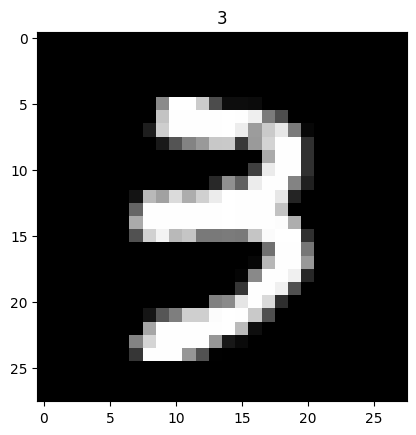

In [ ]:
class_select = np.random.choice(X.shape[0])
plt.imshow(X[class_select].reshape((28,28)), cmap='gray')
plt.title(f'{y[class_select]}')
plt.show()

#1. Realiza lo siguiente:

(a) Carga el dataset completo de Mnist y usa PCA para reducirlo a 2 componentes. Finalmente separa los datos
correspondientes a 1, 5 y 7. Grafica los datos.

In [ ]:
X = df[:,1:]
y = df[:,0]

In [ ]:
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

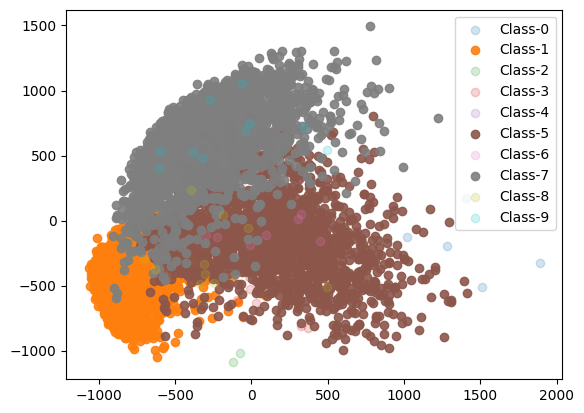

In [ ]:
select = [1, 5, 7]
PCA_comp_0,PCA_comp_1 = 0,1
#Valores de cada clase
for num in range(0,10):
    if num not in select:
        plt.scatter(X_pca[y==num, PCA_comp_0][:10].real,X_pca[y==num, PCA_comp_1][:10].real, label=f'Class-{num}',alpha=.2)
    elif num in select:
        plt.scatter(X_pca[y==num,PCA_comp_0][:].real,X_pca[y==num, PCA_comp_1][:].real, label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

(b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
n_componentes_selec = 2
select = [1,5,7]
#Seleccionamos los puntos a tratar en la tarea.
X_pca_selec = []
y_pca_selec = []
for num in range(0, 10):
    if num in select:
        #Guardamos las clases seleccionadas.
        X_pca_selec.append(X_pca[y == num, :n_componentes_selec])
        y_pca_selec.append([num]*cantidades[num])
#Finalmente concatenamos para crear un data set tipico con n-muestras y m-caracteristicas.
X_pca_selec = np.concatenate(X_pca_selec)
y_pca_selec = np.concatenate(y_pca_selec)
#Entrenamos el modelo
X_Knn_PCA_model = knn_model.fit(X_pca_selec,y_pca_selec)

In [ ]:
print(classification_report(y_pca_selec, X_Knn_PCA_model.predict(X_pca_selec)))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2243
           5       0.92      0.92      0.92      1761
           7       0.95      0.92      0.93      2126

    accuracy                           0.94      6130
   macro avg       0.94      0.94      0.94      6130
weighted avg       0.94      0.94      0.94      6130



(c) Gráfica la malla de clasificación de los datos para k = 3, 4, 5.

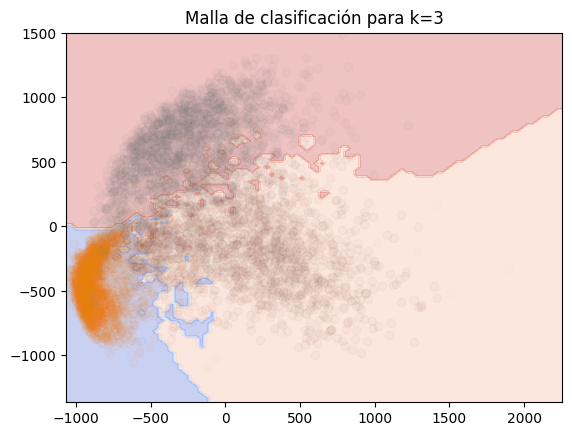

In [ ]:
#Crear un conjunto de puntos para la malla de clasificación
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_space = np.c_[xx.ravel(), yy.ravel()]

#Predecir clases para cada punto en X_space
y_space_pred = knn_model.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_pca[y == num, 0][:10].real, X_pca[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_pca[y == num, 0][:].real, X_pca[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_PCA_model.n_neighbors}')
plt.show()

In [ ]:
knn_model4 = KNeighborsClassifier(n_neighbors=4)
X_Knn_PCA_model4 = knn_model4.fit(X_pca_selec,y_pca_selec)
print(classification_report(y_pca_selec, X_Knn_PCA_model4.predict(X_pca_selec)))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2243
           5       0.89      0.93      0.91      1761
           7       0.96      0.89      0.93      2126

    accuracy                           0.93      6130
   macro avg       0.93      0.93      0.93      6130
weighted avg       0.93      0.93      0.93      6130



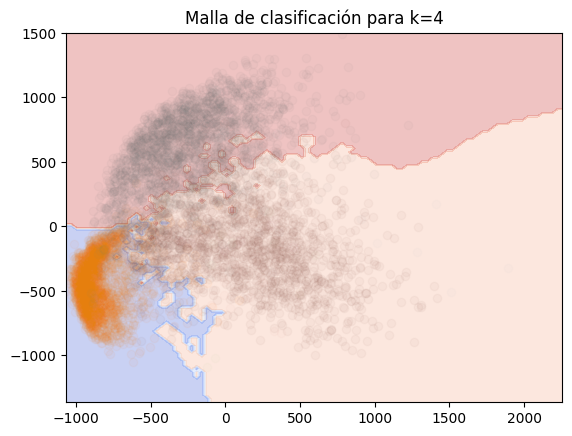

In [ ]:
#Predecir clases para cada punto en X_space
y_space_pred = knn_model4.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_pca[y == num, 0][:10].real, X_pca[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_pca[y == num, 0][:].real, X_pca[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_PCA_model4.n_neighbors}')
plt.show()

In [ ]:
knn_model5 = KNeighborsClassifier(n_neighbors=5)
X_Knn_PCA_model5 = knn_model5.fit(X_pca_selec,y_pca_selec)
print(classification_report(y_pca_selec, X_Knn_PCA_model5.predict(X_pca_selec)))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2243
           5       0.89      0.90      0.90      1761
           7       0.94      0.91      0.93      2126

    accuracy                           0.93      6130
   macro avg       0.93      0.93      0.93      6130
weighted avg       0.93      0.93      0.93      6130



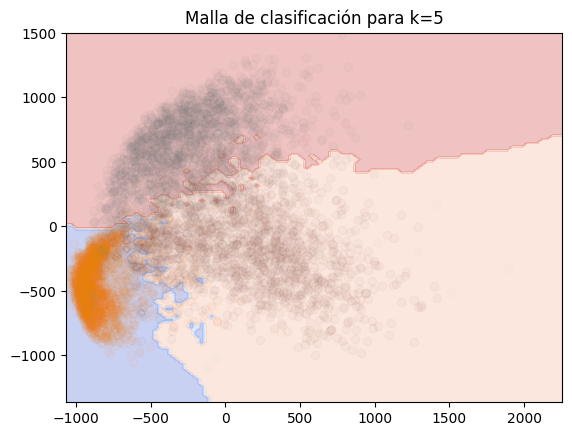

In [ ]:
#Predecir clases para cada punto en X_space
y_space_pred = knn_model5.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_pca[y == num, 0][:10].real, X_pca[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_pca[y == num, 0][:].real, X_pca[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_PCA_model5.n_neighbors}')
plt.show()

#2. Realiza lo siguiente.

(a) Carga el dataset completo de Mnist y usa LDA para reducirlo a 2 componentes. Finalmente separa los datos
correspondientes a 1, 5 y 7. Grafica los datos.

In [ ]:
X = df[:,1:]
y = df[:,0]

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_model.fit_transform(X,y)

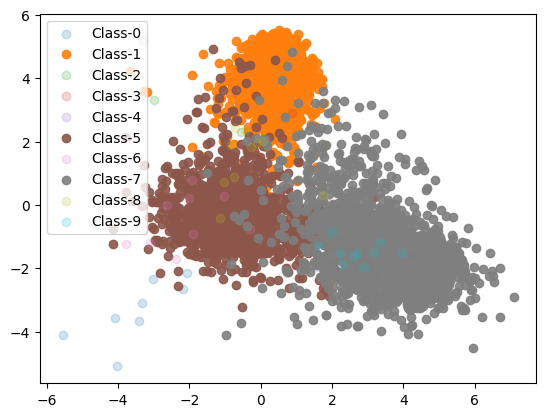

In [ ]:
select = [1,5,7]
LDA_comp_0,LDA_comp_1 = 0,1

#Valores de cada clase
for num in range(0,10):
    if num not in select:
        plt.scatter(X_lda[y==num, LDA_comp_0][:10].real,X_lda[y==num, LDA_comp_1][:10].real, label=f'Class-{num}',alpha=.2)
    elif num in select:
        plt.scatter(X_lda[y==num,LDA_comp_0][:].real,X_lda[y==num, LDA_comp_1][:].real, label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

In [ ]:
print(classification_report(y, lda_model.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1962
           1       0.87      0.96      0.92      2243
           2       0.92      0.82      0.87      1989
           3       0.87      0.86      0.86      2021
           4       0.86      0.90      0.88      1924
           5       0.86      0.83      0.84      1761
           6       0.94      0.93      0.93      2039
           7       0.93      0.85      0.89      2126
           8       0.81      0.82      0.81      1912
           9       0.80      0.86      0.83      2023

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



(b) Con el par de componentes y estas tres clases (1, 5 y 7) entrena un modelo K-NN con k = 3 y realiza un reporte de
clasificación.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
n_componentes_selec = 2
X_lda_selec = []
y_lda_selec = []
for num in range(0, 10):
    if num in select:
        #Guardamos las clases seleccionadas.
        X_lda_selec.append(X_lda[y == num, :n_componentes_selec])
        y_lda_selec.append([num]*cantidades[num])
#Finalmente concatenamos para crear un data set tipico con n-muestras y m-caracteristicas.
X_lda_selec = np.concatenate(X_lda_selec)
y_lda_selec = np.concatenate(y_lda_selec)
#Entrenamos el modelo
X_Knn_LDA_model = knn_model.fit(X_lda_selec,y_lda_selec)

In [ ]:
print(classification_report(y_lda_selec, X_Knn_LDA_model.predict(X_lda_selec)))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      2243
           5       0.96      0.96      0.96      1761
           7       0.97      0.97      0.97      2126

    accuracy                           0.97      6130
   macro avg       0.97      0.97      0.97      6130
weighted avg       0.97      0.97      0.97      6130



(c) Grafica la malla de clasificación de los datos para k = 3, 4, 5.

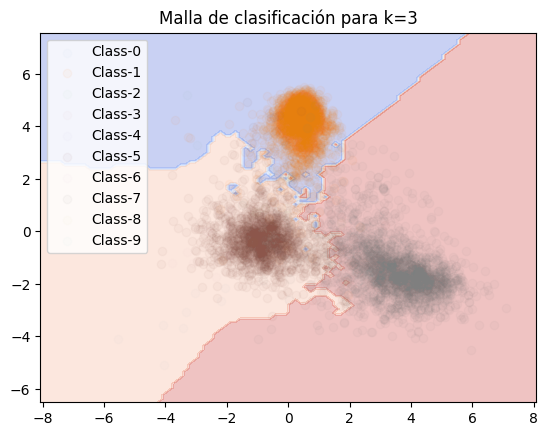

In [ ]:
#Crear un conjunto de puntos para la malla de clasificación
x_min, x_max = X_lda[:, 0].min(), X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min(), X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_space = np.c_[xx.ravel(), yy.ravel()]

#Predecir clases para cada punto en X_space
y_space_pred = knn_model.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_lda[y == num, 0][:10].real, X_lda[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_lda[y == num, 0][:].real, X_lda[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_LDA_model.n_neighbors}')
plt.legend()
plt.show()

In [ ]:
knn_model4 = KNeighborsClassifier(n_neighbors=4)
n_componentes_selec = 2
X_Knn_LDA_model4 = knn_model4.fit(X_lda_selec,y_lda_selec)
print(classification_report(y_lda_selec, X_Knn_LDA_model4.predict(X_lda_selec)))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      2243
           5       0.95      0.95      0.95      1761
           7       0.98      0.96      0.97      2126

    accuracy                           0.97      6130
   macro avg       0.97      0.97      0.97      6130
weighted avg       0.97      0.97      0.97      6130



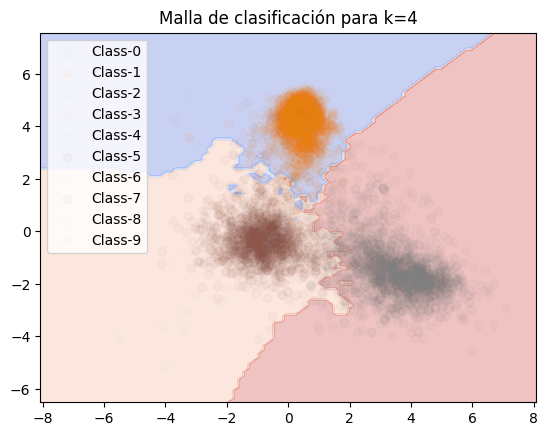

In [ ]:
#Predecir clases para cada punto en X_space
y_space_pred = knn_model4.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_lda[y == num, 0][:10].real, X_lda[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_lda[y == num, 0][:].real, X_lda[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_LDA_model4.n_neighbors}')
plt.legend()
plt.show()

In [ ]:
knn_model5 = KNeighborsClassifier(n_neighbors=5)
n_componentes_selec = 2
X_Knn_LDA_model5 = knn_model5.fit(X_lda_selec,y_lda_selec)
print(classification_report(y_lda_selec, X_Knn_LDA_model5.predict(X_lda_selec)))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      2243
           5       0.95      0.95      0.95      1761
           7       0.97      0.97      0.97      2126

    accuracy                           0.97      6130
   macro avg       0.97      0.97      0.97      6130
weighted avg       0.97      0.97      0.97      6130



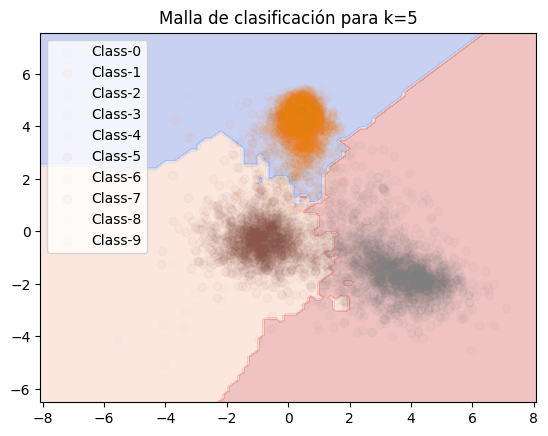

In [ ]:
#Predecir clases para cada punto en X_space
y_space_pred = knn_model5.predict(X_space)

#Graficar la malla de clasificación
plt.contourf(xx, yy, y_space_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.3)

#Graficar los puntos de entrenamiento
for num in range(0, 10):
    if num not in select:
        plt.scatter(X_lda[y == num, 0][:10].real, X_lda[y == num, 1][:10].real, label=f'Class-{num}', alpha=0.01)
    elif num in select:
        plt.scatter(X_lda[y == num, 0][:].real, X_lda[y == num, 1][:].real, label=f'Class-{num}', alpha=0.04)

plt.title(f'Malla de clasificación para k={X_Knn_LDA_model5.n_neighbors}')
plt.legend()
plt.show()

# 3. Discutan en equipos los reportes de clasificación de los inciso 1b y 2b. ¿Qué modelo es mejor para separar estas clases y clasificar las mediante K-NN?

Con la clasificacion PCA el modelo parece tener un buen rendimiento en la clasificación según las métricas proporcionadas en la tabla. Del mismo modo para la clasificacion LDA con una precisión del 97% en todas las clases y promedios altos tanto ponderados como no ponderados. Un 97% de precisión general es un indicador fuerte de la capacidad del modelo para clasificar correctamente las instancias en todas las clases.

En comparacion con PCA el modelo LDA parece tener un rendimiento aún mejor en términos de accuracy y promedios por lo tanto es mejor para separar las clases y clasificar.

# 4. De acuerdo a lo visto en clase sobre el perceptrón simple.


### a) Mencionen el valor del peso wj correspondiente al valor del bias o sesgo que se obtiene en clase.

W al final del entrenamiento visto en clase se encuentra en los siguientes valores:

[4e-10, -2.1557e-10, -2.1758e-10]

### b) Creen una función que calcule el valor predicho por la neurona sin modificar los pesos de la red.

In [ ]:
step_function = lambda x: 1 if x > 0 else 0

def perceptron_predict(inputs, weights, bias):
    """
    Calcula la predicción de un perceptrón.
    """
    if len(inputs) != len(weights):
        raise ValueError("Las entradas y los pesos deben tener la misma longitud.")

    # Calcula la suma ponderada de las entradas
    weighted_sum = np.dot(weights, inputs) + bias

    # Aplica la función de activación a la suma ponderada
    prediction = step_function(weighted_sum)

    return prediction



### c) Cree una función que calcule el error cuadrático medio(ECM).

In [ ]:
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test, y_pred)

def mean_squared_error(true_values, predicted_values):
    """
    Calculate the mean squared error between true and predicted values.
    """
    if len(true_values) != len(predicted_values):
        raise ValueError("Input arrays must have the same length.")

    # Calculate the squared differences
    squared_diff = (np.array(true_values) - np.array(predicted_values))**2

    # Calculate the mean of the square error
    mse = np.mean(squared_diff)

    return mse

### d) Realiza una gráfica de linea del comportamiento del ECM para 30 épocas. Usando n = 1, .2, .02 ¿Cuál o cuales valores de n (taza de aprendizaje) funcionan de forma más adecuada?¿Cuales no? Argumente su respuestas ayudándose de la gráfica.

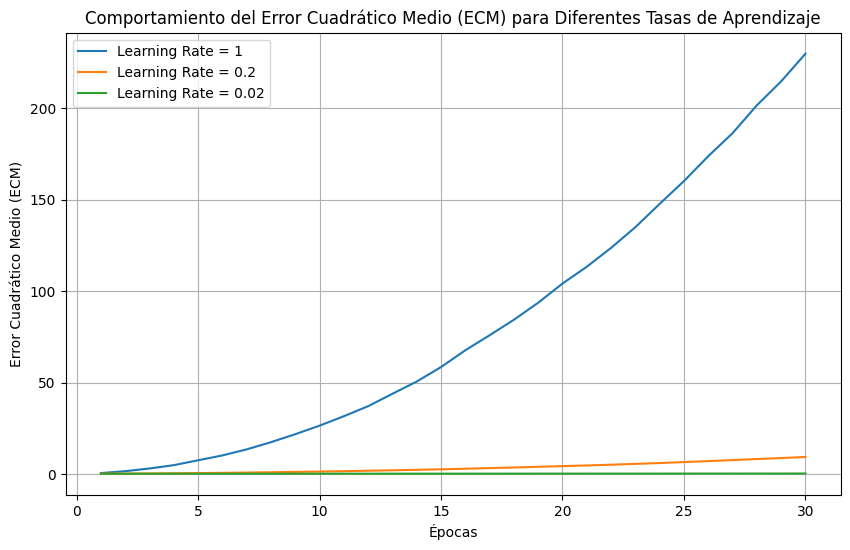

In [ ]:
def gradient_descent(epochs, learning_rate):
    """
    Perform gradient descent and return the list of mean squared errors for each epoch.
    """
    # Assuming you have some data and initial predictions, replace the following lines
    # with your actual data and model update steps.
    true_values = np.random.rand(100)
    predicted_values = np.random.rand(100)

    mse_values = []

    for epoch in range(epochs):
        # Update your model parameters here
        # For simplicity, we'll use a random update in this example
        predicted_values += np.random.rand(100) * learning_rate

        # Calculate mean squared error and append to the list
        mse = mean_squared_error(true_values, predicted_values)
        mse_values.append(mse)

    return mse_values

# Number of epochs
epochs = 30

# Learning rates to test
learning_rates = [1, 0.2, 0.02]

# Dictionary to store results
results = {}

# Perform gradient descent for each learning rate
for lr in learning_rates:
    mse_values = gradient_descent(epochs, lr)
    results[f'Learning Rate = {lr}'] = mse_values

# Plot the results
plt.figure(figsize=(10, 6))

for label, mse_values in results.items():
    plt.plot(range(1, epochs + 1), mse_values, label=label)

plt.title('Comportamiento del Error Cuadrático Medio (ECM) para Diferentes Tasas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (ECM)')
plt.legend()
plt.grid(True)
plt.show()